In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sourmash_utils

In [3]:
import glob
import os

In [4]:
! ls -1 /mnt/data/maca-facs-sourmash_compute_all/ | head

A10-B000126-3_39_F-1-1.sig
A10-B000127-3_38_F-1-1.sig
A10-B000166-3_56_F-1-1.sig
A10-B000167-3_56_F-1-1.sig
A10-B000412-3_56_F-1-1.sig
A10-B000610-3_56_F-1-1.sig
A10-B000633-3_56_F-1-1.sig
A10-B000636-3_56_F-1-1.sig
A10-B000826-3_39_F-1-1.sig
A10-B000827-3_38_F-1-1.sig
ls: write error: Broken pipe


In [5]:
folder = '/mnt/data/maca-facs-sourmash_compute_all'

In [7]:
sourmash_utils.describe(f'{folder}/A10-B000126-3_39_F-1-1.sig')

,ksize,molecule,n_mins,name
0,21,protein,8471,cell_ontology_class:keratinocyte_stem_cell|tis...
1,21,DNA,4593,cell_ontology_class:keratinocyte_stem_cell|tis...
2,27,protein,8920,cell_ontology_class:keratinocyte_stem_cell|tis...
3,27,DNA,4769,cell_ontology_class:keratinocyte_stem_cell|tis...
4,33,protein,9175,cell_ontology_class:keratinocyte_stem_cell|tis...
5,33,DNA,4755,cell_ontology_class:keratinocyte_stem_cell|tis...
6,51,protein,8755,cell_ontology_class:keratinocyte_stem_cell|tis...
7,51,DNA,4444,cell_ontology_class:keratinocyte_stem_cell|tis...


In [ ]:
dfs = [sourmash_utils.describe(sig) for sig in glob.iglob(f'{folder}/*.sig')]
print(len(dfs))

In [10]:
import pandas as pd

In [11]:
descriptions_all = pd.concat(dfs)
print(descriptions_all.shape)
descriptions_all.head()

(325508, 4)


,ksize,molecule,n_mins,name
0,21,protein,24889,cell_ontology_class:cardiac_muscle_cell|tissue...
1,21,DNA,14002,cell_ontology_class:cardiac_muscle_cell|tissue...
2,27,protein,27342,cell_ontology_class:cardiac_muscle_cell|tissue...
3,27,DNA,14704,cell_ontology_class:cardiac_muscle_cell|tissue...
4,33,protein,28107,cell_ontology_class:cardiac_muscle_cell|tissue...


In [15]:
import numpy as np

In [17]:
descriptions_all['log10_n_mins'] = np.log10(descriptions_all.n_mins)
descriptions_all.head()

,ksize,molecule,n_mins,name,log10_n_mins
0,21,protein,24889,cell_ontology_class:cardiac_muscle_cell|tissue...,4.396007
1,21,DNA,14002,cell_ontology_class:cardiac_muscle_cell|tissue...,4.146190
2,27,protein,27342,cell_ontology_class:cardiac_muscle_cell|tissue...,4.436830
3,27,DNA,14704,cell_ontology_class:cardiac_muscle_cell|tissue...,4.167435
4,33,protein,28107,cell_ontology_class:cardiac_muscle_cell|tissue...,4.448814


In [26]:
descriptions_all.to_csv('/mnt/data/maca-facs-sourmash_compute_all_descriptions.csv')

In [24]:
# descriptions_all.mean()

[autoreload of sourmash_utils failed: Traceback (most recent call last):
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/home/ubuntu/anaconda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/ubuntu/anaconda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/ubuntu/kmer-hashin

In [25]:
# descriptions_all.median()

In [12]:
import seaborn as sns
%matplotlib inline

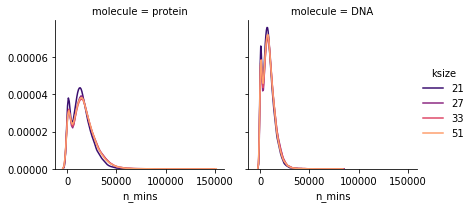

In [19]:
g = sns.FacetGrid(descriptions_all, col='molecule', hue='ksize', palette='magma')
g.map(sns.kdeplot, 'n_mins', shade=False)
g.add_legend()

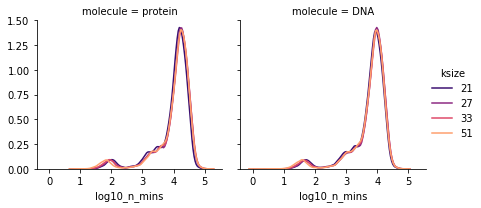

In [20]:
g = sns.FacetGrid(descriptions_all, col='molecule', hue='ksize', palette='magma')
g.map(sns.kdeplot, 'log10_n_mins', shade=False)
g.add_legend()

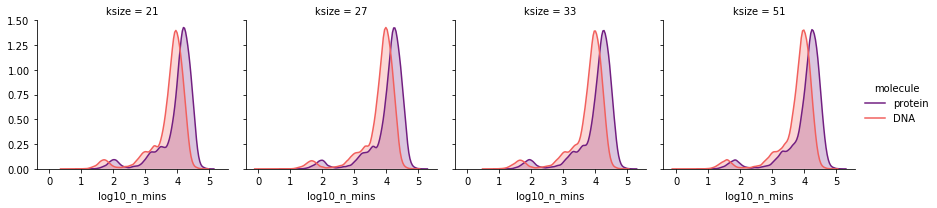

In [22]:
g = sns.FacetGrid(descriptions_all, col='ksize', hue='molecule', palette='magma')
g.map(sns.kdeplot, 'log10_n_mins', shade=True)
g.add_legend()

In [28]:
bladder_droplet = pd.read_csv('/mnt/data/10X_P4_3/descriptions.csv')
bladder_droplet.head()

TypeError: reduce() takes at most 5 arguments (6 given)

,ksize,molecule,n_mins,name,log10_n_mins
0,21,protein,4331,cell_ontology_class:bladder_urothelial_cell|ti...,3.636588
1,21,DNA,2404,cell_ontology_class:bladder_urothelial_cell|ti...,3.380934
2,27,protein,4644,cell_ontology_class:bladder_urothelial_cell|ti...,3.666892
3,27,DNA,2460,cell_ontology_class:bladder_urothelial_cell|ti...,3.390935
4,33,protein,4699,cell_ontology_class:bladder_urothelial_cell|ti...,3.672005


In [29]:
bladder_droplet['method'] = '10x (droplet)'
descriptions_all['method'] = 'FACS (SmartSeq2)'

In [30]:
descriptions_concat = pd.concat([bladder_droplet, descriptions_all], ignore_index=True)
print(descriptions_concat.shape)
descriptions_concat.head()

(326692, 6)


TypeError: reduce() takes at most 5 arguments (6 given)

,ksize,molecule,n_mins,name,log10_n_mins,method
0,21,protein,4331,cell_ontology_class:bladder_urothelial_cell|ti...,3.636588,10x (droplet)
1,21,DNA,2404,cell_ontology_class:bladder_urothelial_cell|ti...,3.380934,10x (droplet)
2,27,protein,4644,cell_ontology_class:bladder_urothelial_cell|ti...,3.666892,10x (droplet)
3,27,DNA,2460,cell_ontology_class:bladder_urothelial_cell|ti...,3.390935,10x (droplet)
4,33,protein,4699,cell_ontology_class:bladder_urothelial_cell|ti...,3.672005,10x (droplet)


In [32]:
%matplotlib inline

In [33]:
g = sns.FacetGrid(descriptions_concat, col='ksize',
                   row='molecule',
                   hue='method', palette='magma')
g.map(sns.kdeplot, 'log10_n_mins', shade=False)
g.add_legend()

TypeError: reduce() takes at most 5 arguments (6 given)

<Figure size 864x432 with 0 Axes>